In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Display 
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load 
df = pd.read_csv("netflix_titles.csv")

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape


(8807, 12)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df = df.dropna(subset=["type", "release_year"])

df["country"] = df["country"].fillna("Unknown")
df["rating"] = df["rating"].fillna("Unknown")
df["listed_in"] = df["listed_in"].fillna("Unknown")


In [7]:
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month


In [8]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

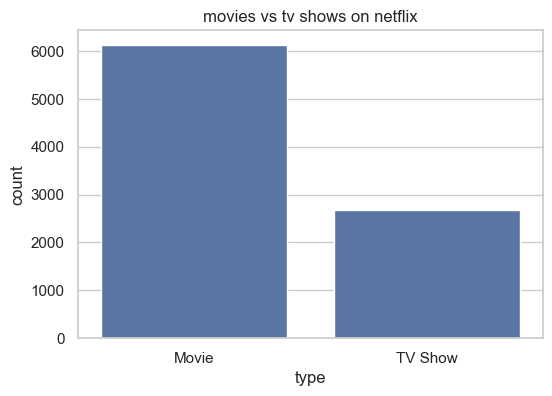

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type")
plt.title("movies vs tv shows on netflix")
plt.show()

In [15]:
titles_per_year = df.groupby("year_added").size()

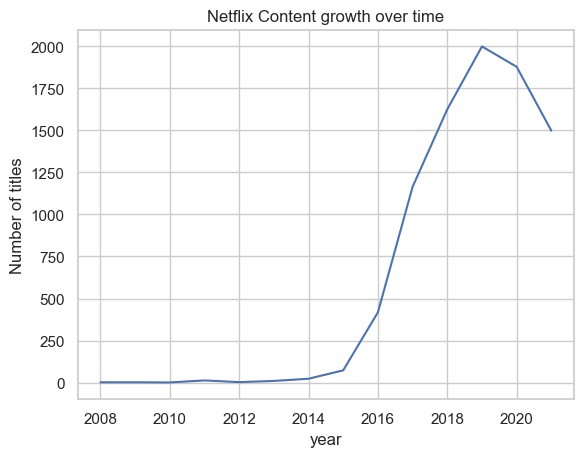

In [16]:
plt.Figure(figsize=(10,5))
titles_per_year.plot()
plt.title("Netflix Content growth over time")
plt.xlabel("year")
plt.ylabel("Number of titles")
plt.show()

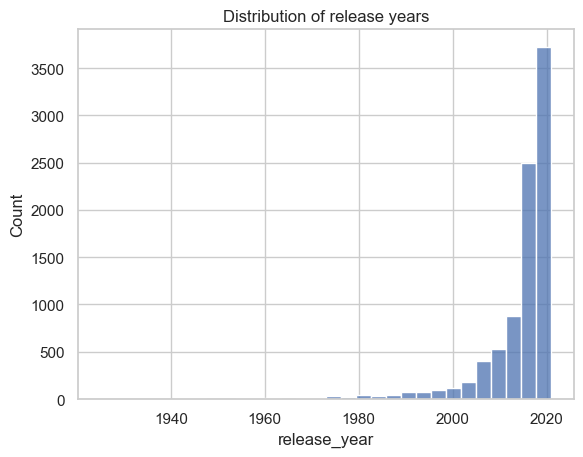

In [17]:
plt.Figure(figsize=(10,5))
sns.histplot(df["release_year"],bins=30)
plt.title("Distribution of release years")
plt.show()

In [19]:
genres = df["listed_in"].str.split(", ")
genres_exploded = genres.explode()

In [21]:
top_genres = genres_exploded.value_counts().head(10)
top_genres

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

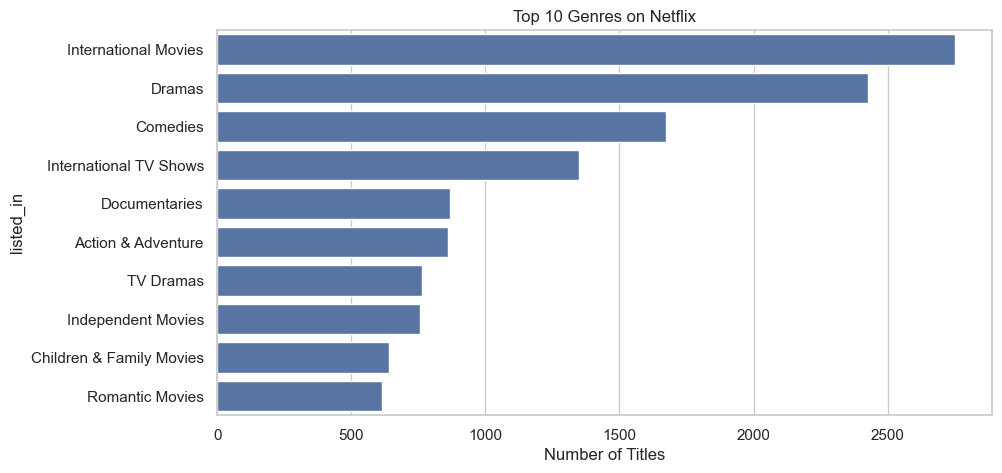

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.show()

In [24]:
countries =df["country"].str.split(", ").explode()
top_countries = countries.value_counts().head(10)

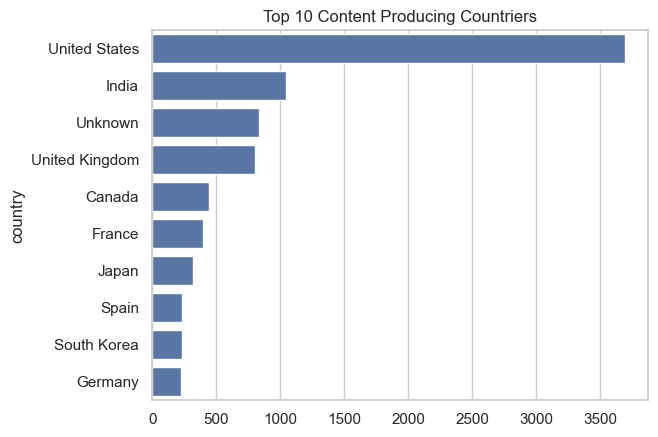

In [25]:
plt.Figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Content Producing Countriers")
plt.show()

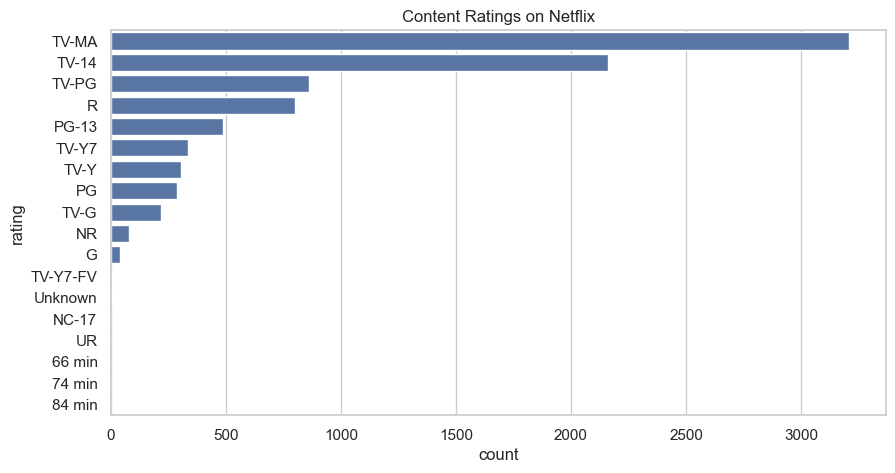

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="rating", order=df["rating"].value_counts().index)
plt.title("Content Ratings on Netflix")
plt.show()


In [27]:
type_year = df.groupby(["year_added", "type"]).size().unstack()


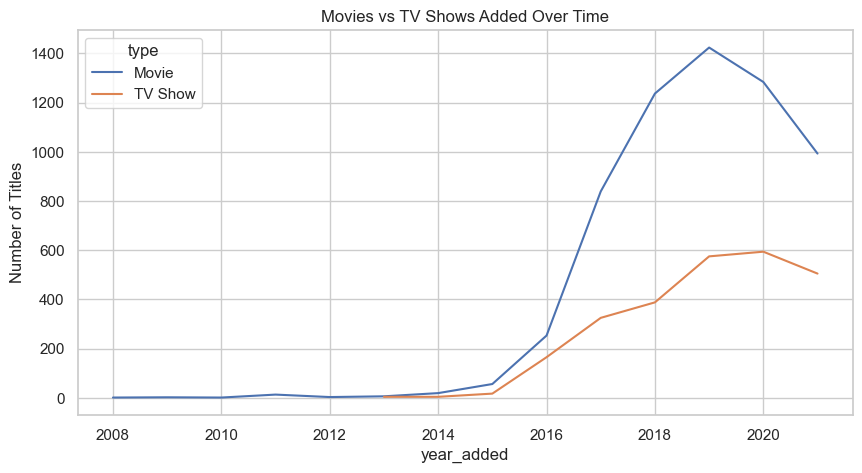

In [28]:
type_year.plot(figsize=(10,5))
plt.title("Movies vs TV Shows Added Over Time")
plt.ylabel("Number of Titles")
plt.show()
